In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.output {font-size:10pt;}
div.input {font-family:Consolas; font-size:10pt; font-weight:bold;}
div.prompt {min-width:70px;}
</style>
"""))

In [14]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 1. 데이터셋 생성 
width = 28; height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, width * height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width * height).astype('float32') / 255.0

x_val = x_train[50000: ]
y_val = y_train[50000: ]
x_train = x_train[ :50000]
y_train = y_train[ :50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

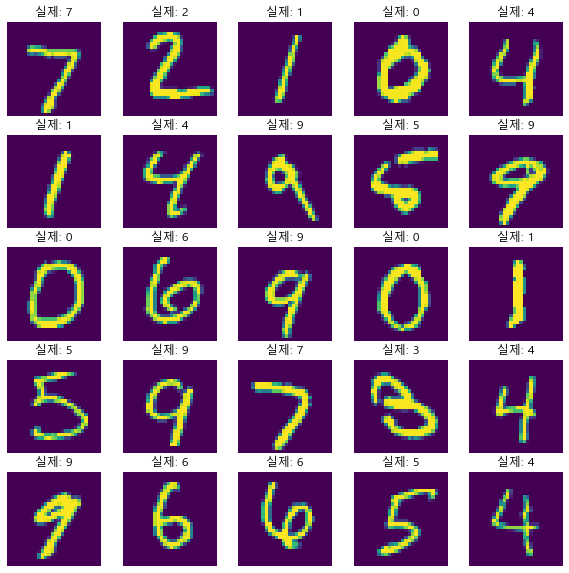

In [6]:
plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('font', family='Malgun Gothic')
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row * plt_col):  # 데이터를 5*5로 쌓기
    sub_plt = axarr[i//5, i%5] # i//5가 되는 순간 i행으로 떨어지도록 
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off") # 축 제거 
    sub_plt.set_title('실제: ' + str(np.argmax(y_test[i])))

# DNN(다중 퍼셉트론)

Epoch 1/30
1563/1563 [==============================] - 29s 18ms/step - loss: 0.2195 - accuracy: 0.9332 - val_loss: 0.1347 - val_accuracy: 0.9579
Epoch 2/30
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0947 - accuracy: 0.9719 - val_loss: 0.1080 - val_accuracy: 0.9676
Epoch 3/30
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0711 - accuracy: 0.9781 - val_loss: 0.0899 - val_accuracy: 0.9736
Epoch 4/30
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0541 - accuracy: 0.9837 - val_loss: 0.1049 - val_accuracy: 0.9713
Epoch 5/30
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0923 - val_accuracy: 0.9778
Epoch 6/30
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.1173 - val_accuracy: 0.9729
Epoch 7/30
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.1086 -

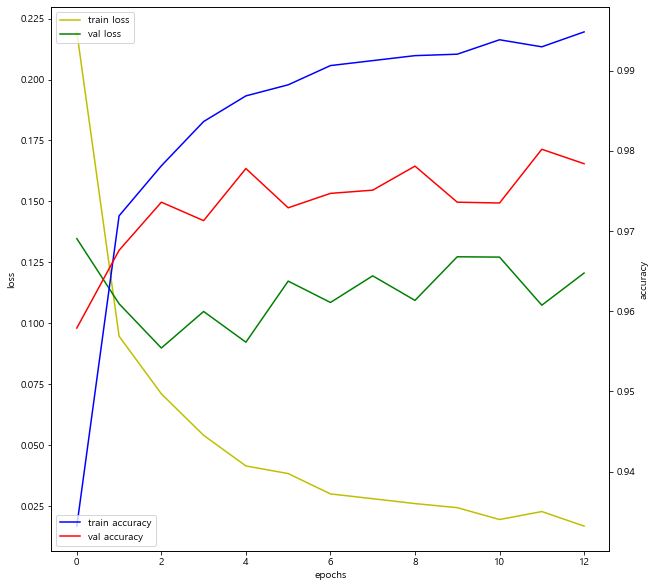

313/313 [==============================] - 2s 8ms/step - loss: 0.1048 - accuracy: 0.9804


loss:  0.10475736111402512 ,metrics["accuracy"]:  0.980400025844574


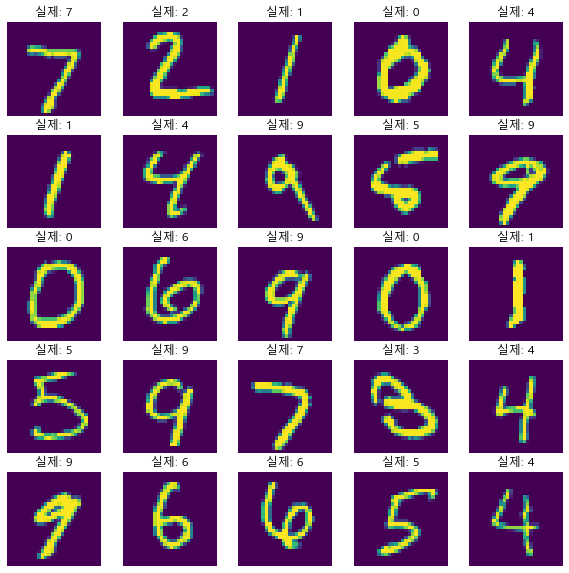

In [9]:
# 1. 데이터셋 생성 
width = 28; height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, width * height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width * height).astype('float32') / 255.0

x_val = x_train[50000: ]
y_val = y_train[50000: ]
x_train = x_train[ :50000]
y_train = y_train[ :50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

# 2. 모델 구성 
model = Sequential()

model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 학습과정 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train,
                 epochs=30, 
                 batch_size=32,
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기 
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# 6. 모델 평가하기 
score = model.evaluate(x_test, y_test, batch_size=32)
print('\n\nloss: ', score[0], ',metrics["accuracy"]: ', score[1])

# 7. 모델 사용하기
yhat = model.predict(x_test, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('font', family='Malgun Gothic')
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row * plt_col):  
    sub_plt = axarr[i//5, i%5]  
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off") 
    sub_plt.set_title('실제: ' + str(np.argmax(y_test[i])))

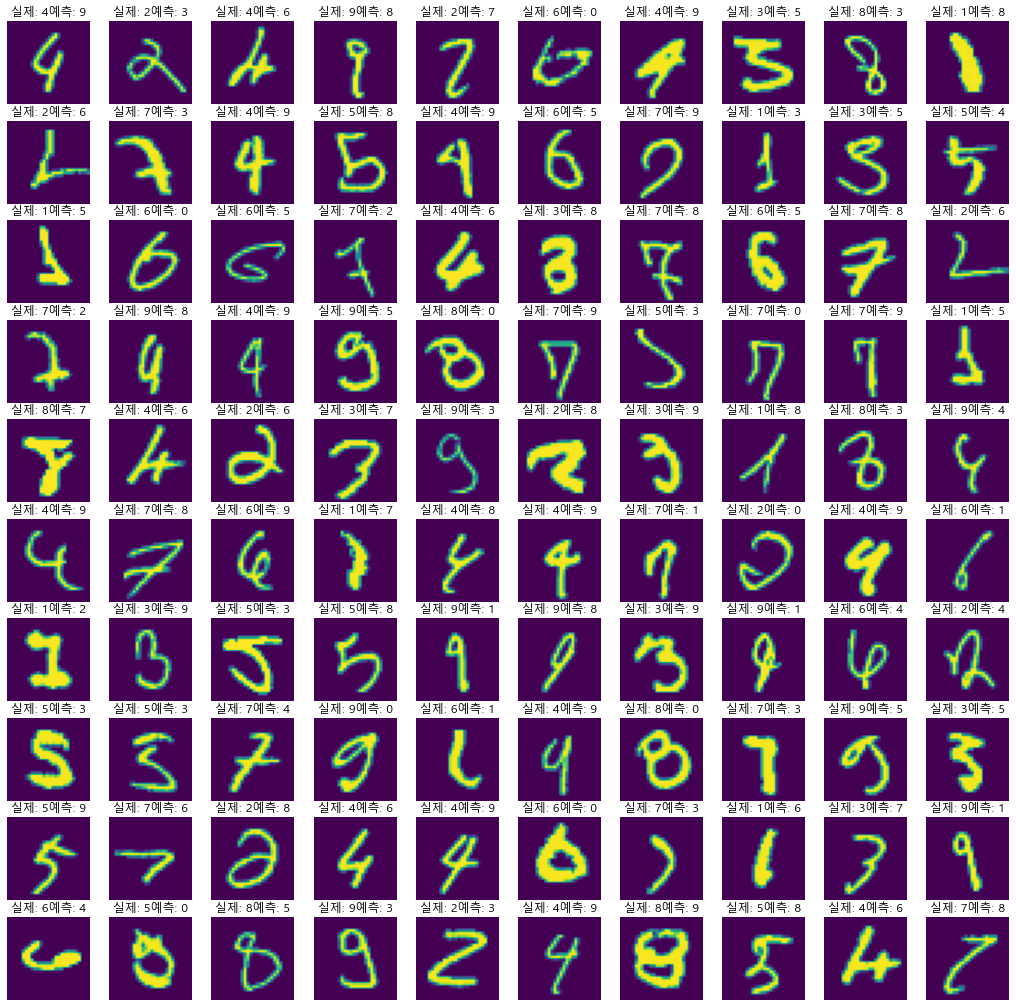

In [10]:
# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)

plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18, 18)
plt.rc('font', family = 'Malgun Gothic')
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0

while cnt < (plt_row * plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]): # 실제값과 예측값이 같으면
        i += 1
        continue # i값만 증가시키고 다시 위로 올라간다. 
    
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis('off')
    title = '실제: ' + str(np.argmax(y_test[i])) + '예측: ' + str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1 

# CNN(컨볼루션 레이어 -> 깊은 컨볼루션 레이어)

Epoch 1/30
1563/1563 [==============================] - 137s 88ms/step - loss: 0.1502 - accuracy: 0.9536 - val_loss: 0.0592 - val_accuracy: 0.9835
Epoch 2/30
1563/1563 [==============================] - 152s 97ms/step - loss: 0.0473 - accuracy: 0.9856 - val_loss: 0.0489 - val_accuracy: 0.9860
Epoch 3/30
1563/1563 [==============================] - 133s 85ms/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0392 - val_accuracy: 0.9883
Epoch 4/30
1563/1563 [==============================] - 117s 75ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0412 - val_accuracy: 0.9894
Epoch 5/30
1563/1563 [==============================] - 120s 77ms/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.0354 - val_accuracy: 0.9912
Epoch 6/30
1563/1563 [==============================] - 132s 84ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.0438 - val_accuracy: 0.9899
Epoch 7/30
1563/1563 [==============================] - 116s 74ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0

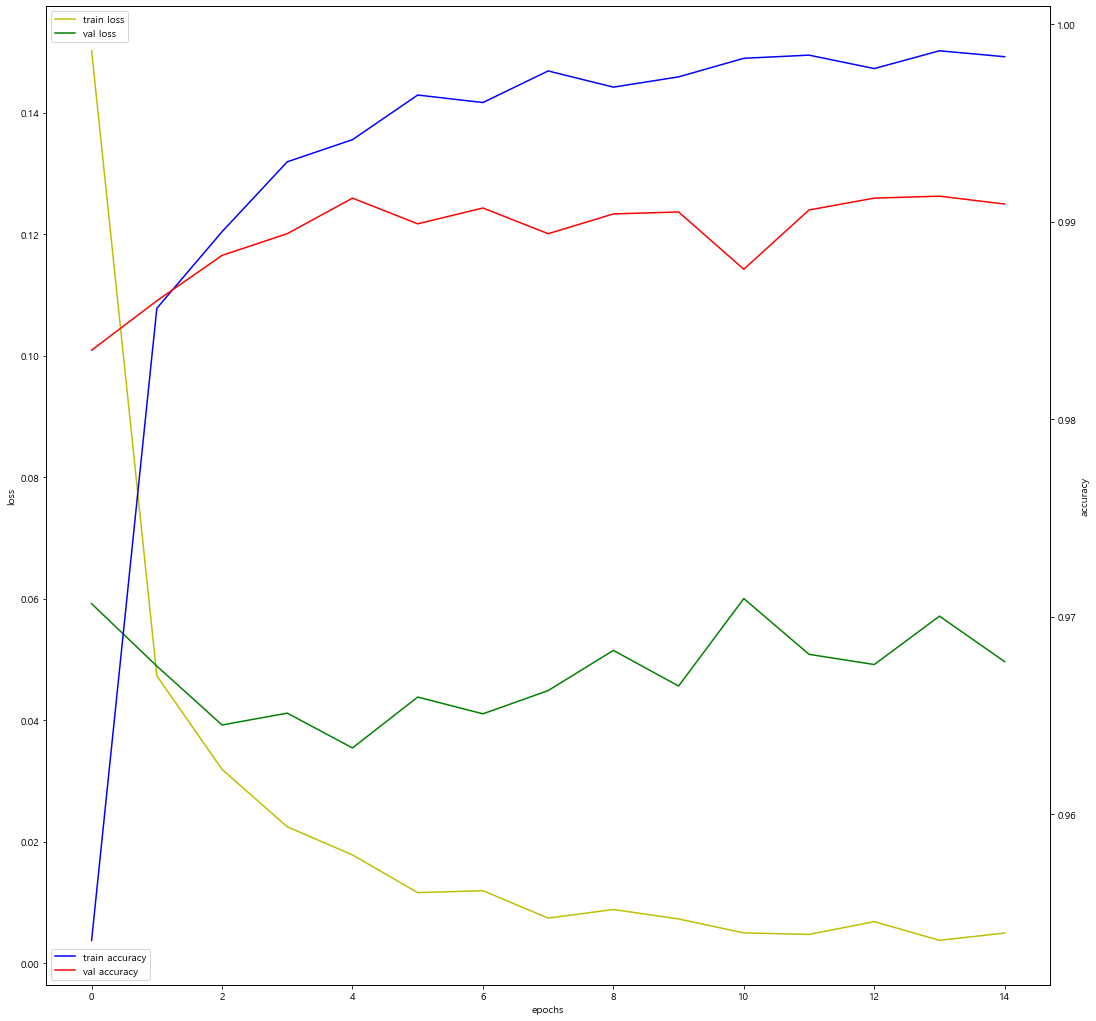

313/313 [==============================] - 9s 28ms/step - loss: 0.0390 - accuracy: 0.9913


loss:  0.03895623981952667 ,metrics["accuracy"]:  0.9912999868392944


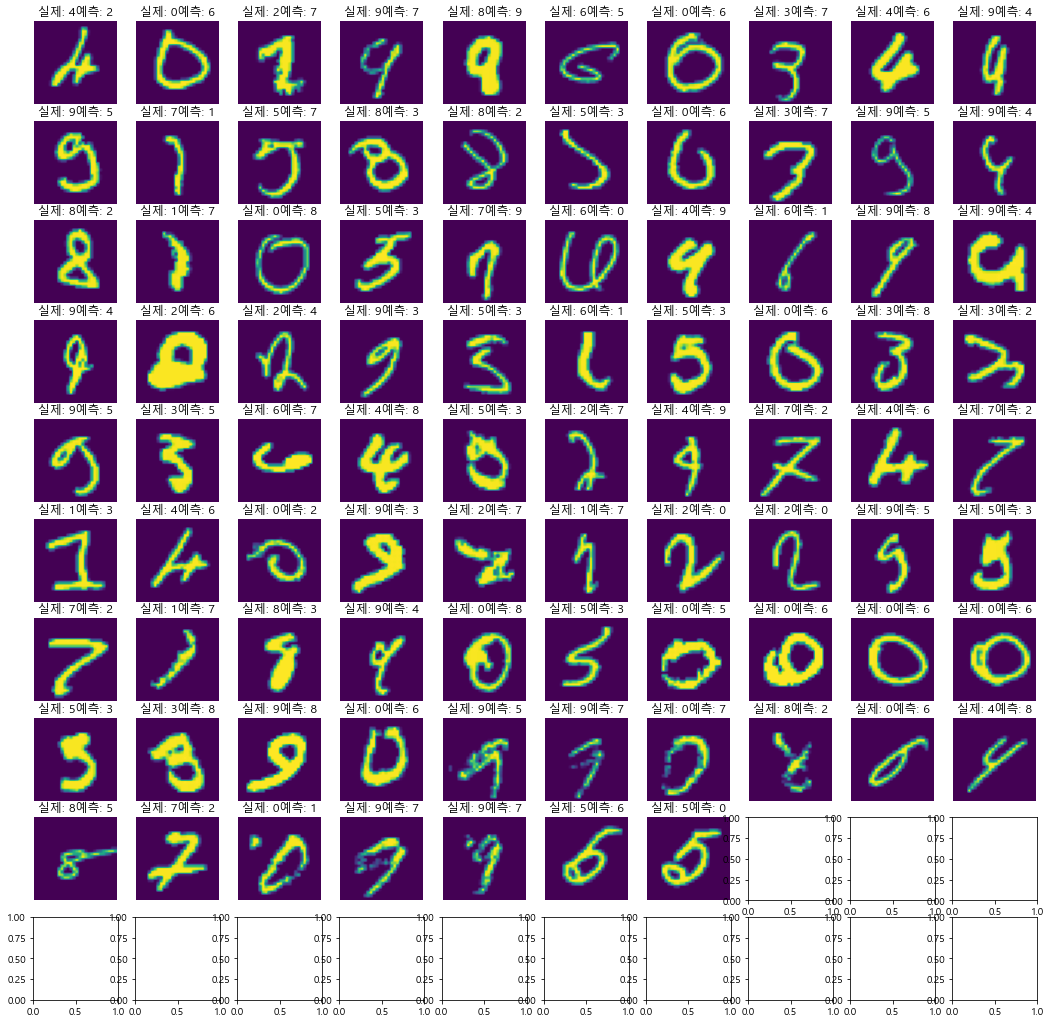

In [15]:
# 1. 데이터셋 생성 
width = 28; height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0  # 3차원
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000: ]
y_val = y_train[50000: ]
x_train = x_train[ :50000]
y_train = y_train[ :50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

# 2. 모델 구성 
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPool2D(pool_size=(2,2))) # 2*2 중에 큰 값만 뽑아내내서 한 픽셀로

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 학습과정 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train,
                 epochs=30, 
                 batch_size=32,
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기 
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# 6. 모델 평가하기 
score = model.evaluate(x_test, y_test, batch_size=32)
print('\n\nloss: ', score[0], ',metrics["accuracy"]: ', score[1])

# 7. 모델 사용하기
yhat = model.predict(x_test, batch_size=32)

plt_row = 10
plt_col = 10

plt.rcParams['figure.figsize'] = (18, 18)
plt.rc('font', family='Malgun Gothic')
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0

while (cnt < (plt_row * plt_col)) and (i <len(yhat)):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis('off')
    title = '실제: ' + str(np.argmax(y_test[i])) + '예측: ' + str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1 

**accuracy 늘리기**

Epoch 1/30
1563/1563 [==============================] - 669s 428ms/step - loss: 0.1524 - accuracy: 0.9523 - val_loss: 0.0423 - val_accuracy: 0.9868
Epoch 2/30
1563/1563 [==============================] - 676s 433ms/step - loss: 0.0523 - accuracy: 0.9832 - val_loss: 0.0355 - val_accuracy: 0.9901
Epoch 3/30
1563/1563 [==============================] - 716s 458ms/step - loss: 0.0374 - accuracy: 0.9884 - val_loss: 0.0291 - val_accuracy: 0.9919
Epoch 4/30
1563/1563 [==============================] - 720s 461ms/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.0366 - val_accuracy: 0.9901
Epoch 5/30
1563/1563 [==============================] - 692s 443ms/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0322 - val_accuracy: 0.9908
Epoch 6/30
1563/1563 [==============================] - 690s 441ms/step - loss: 0.0214 - accuracy: 0.9932 - val_loss: 0.0339 - val_accuracy: 0.9905
Epoch 7/30
1563/1563 [==============================] - 855s 547ms/step - loss: 0.0212 - accuracy: 0.9931 - val_

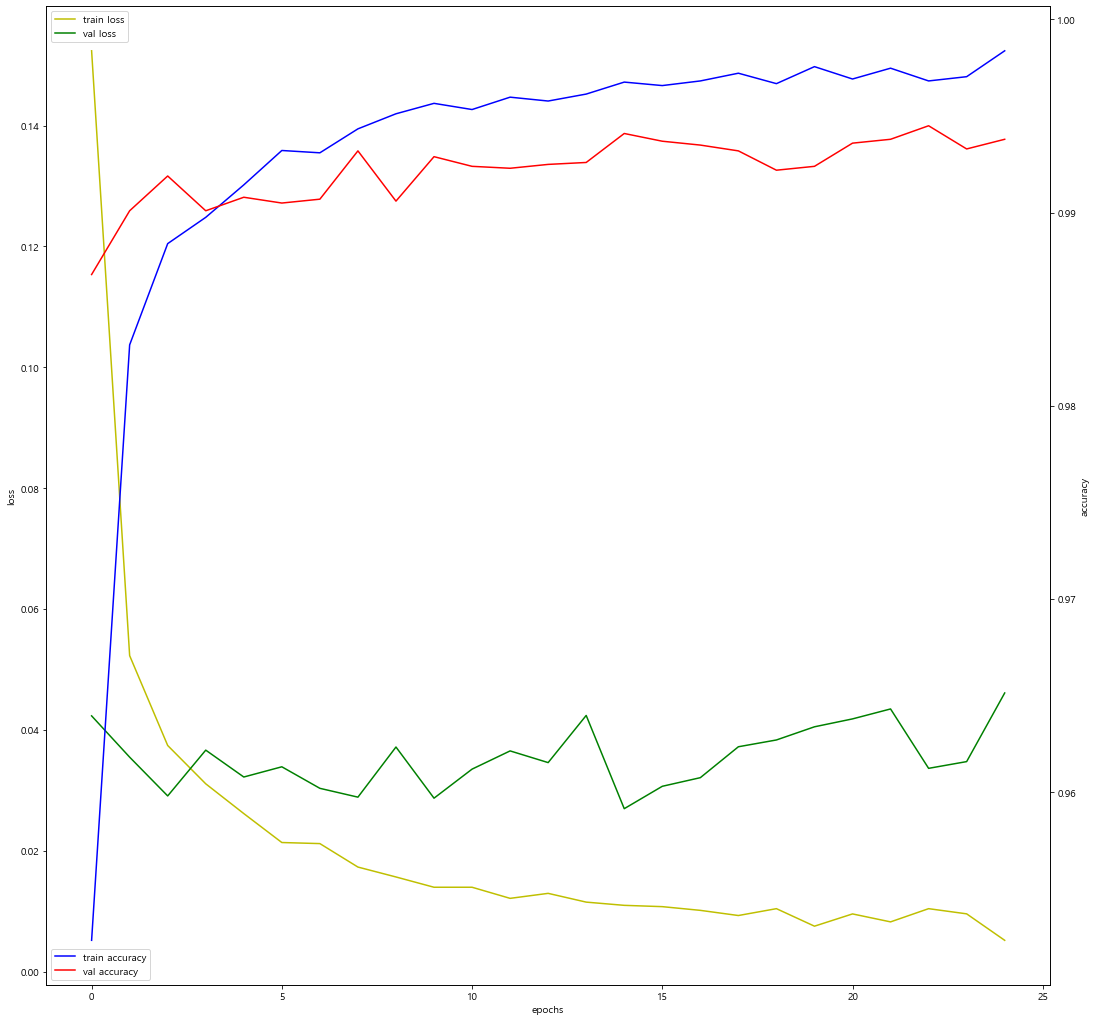

313/313 [==============================] - 36s 116ms/step - loss: 0.0413 - accuracy: 0.9930


loss:  0.04125528782606125 ,metrics["accuracy"]:  0.9929999709129333


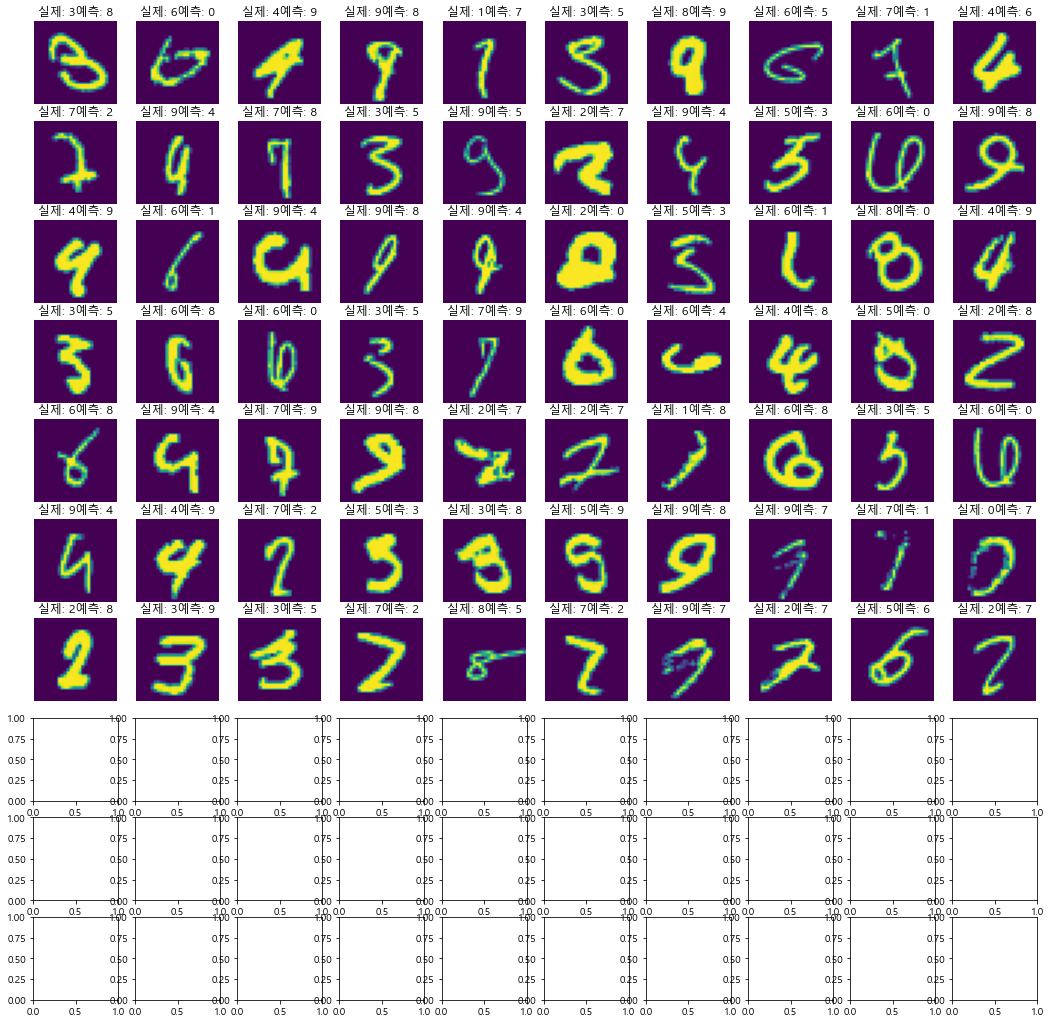

In [16]:
# 1. 데이터셋 생성 
width = 28; height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000: ]
y_val = y_train[50000: ]
x_train = x_train[ :50000]
y_train = y_train[ :50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

# 2. 모델 구성 
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

# 3. 학습과정 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train,
                 epochs=30, 
                 batch_size=32,
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기 
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# 6. 모델 평가하기 
score = model.evaluate(x_test, y_test, batch_size=32)
print('\n\nloss: ', score[0], ',metrics["accuracy"]: ', score[1])

# 7. 모델 사용하기
yhat = model.predict(x_test, batch_size=32)

plt_row = 10
plt_col = 10

plt.rcParams['figure.figsize'] = (18, 18)
plt.rc('font', family='Malgun Gothic')
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0

while (cnt < (plt_row * plt_col)) and (i <len(yhat)):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis('off')
    title = '실제: ' + str(np.argmax(y_test[i])) + '예측: ' + str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1 